# RNN Project
### Team Name: Dynamic Neurons
Sathvik Chava	11752889
Sumanjali Banjara	11821870
David Adeyemi	11828970
Andrew Gunason Paul	11835138


In [1194]:
# Importing essential libraries for data manipulation, visualization, and preprocessing
# Suppressing warnings for cleaner output
# MinMaxScaler will be used for normalization of data
# Ensures plots are displayed within the notebook
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing import MinMaxScaler
# Settings for better visuals using Seaborn
plt.style.use('seaborn-v0_8')
sns.set_palette('pastel')
%matplotlib inline

In [1195]:
# Loading the dataset
#Please make sure to update the correct file path
file_path = '/Users/sathvikchava/my files/sem2/RNN/project-code/energydata_complete.csv'
df = pd.read_csv(file_path)

# printing the data types of variables and data head
print("Shape of the dataset:", df.shape)
print("\nData types:\n", df.dtypes)
print("\nFirst 5 rows of the dataset:")
print(df.head())


Shape of the dataset: (19735, 29)

Data types:
 date            object
Appliances       int64
lights           int64
T1             float64
RH_1           float64
T2             float64
RH_2           float64
T3             float64
RH_3           float64
T4             float64
RH_4           float64
T5             float64
RH_5           float64
T6             float64
RH_6           float64
T7             float64
RH_7           float64
T8             float64
RH_8           float64
T9             float64
RH_9           float64
T_out          float64
Press_mm_hg    float64
RH_out         float64
Windspeed      float64
Visibility     float64
Tdewpoint      float64
rv1            float64
rv2            float64
dtype: object

First 5 rows of the dataset:
                  date  Appliances  lights     T1       RH_1    T2       RH_2  \
0  2016-01-11 17:00:00          60      30  19.89  47.596667  19.2  44.790000   
1  2016-01-11 17:10:00          60      30  19.89  46.693333  19.2  44.722500  

In [1196]:
#  Converting 'date' column to datetime (auto-detect format)
df['date'] = pd.to_datetime(df['date'])

# Set 'date' as the index
df.set_index('date', inplace=True)

#Check result
print("\nIndex after conversion:")
print(df.index)
print("\nFirst 5 rows after setting 'date' as index:")
print(df.head())



Index after conversion:
DatetimeIndex(['2016-01-11 17:00:00', '2016-01-11 17:10:00',
               '2016-01-11 17:20:00', '2016-01-11 17:30:00',
               '2016-01-11 17:40:00', '2016-01-11 17:50:00',
               '2016-01-11 18:00:00', '2016-01-11 18:10:00',
               '2016-01-11 18:20:00', '2016-01-11 18:30:00',
               ...
               '2016-05-27 16:30:00', '2016-05-27 16:40:00',
               '2016-05-27 16:50:00', '2016-05-27 17:00:00',
               '2016-05-27 17:10:00', '2016-05-27 17:20:00',
               '2016-05-27 17:30:00', '2016-05-27 17:40:00',
               '2016-05-27 17:50:00', '2016-05-27 18:00:00'],
              dtype='datetime64[ns]', name='date', length=19735, freq=None)

First 5 rows after setting 'date' as index:
                     Appliances  lights     T1       RH_1    T2       RH_2  \
date                                                                         
2016-01-11 17:00:00          60      30  19.89  47.596667  19.2  44.

In [1197]:
# Check if the date index is in chronological order
is_sorted = df.index.is_monotonic_increasing


if is_sorted:
    print("The date index is in correct chronological order.")
else:
    print("The date index is NOT in chronological order.")


The date index is in correct chronological order.


In [1198]:
# Extract basic time features into new columns
df['hour'] = df.index.hour
df['dayofweek'] = df.index.dayofweek # "0" being "Monday" and "6" being "Saturday"
df['month'] = df.index.month
df['is_weekend'] = df['dayofweek'].apply(lambda x: 1 if x >= 5 else 0) #(1/0) to inndicate if it's a weekend or not

# Sinusoidal encoding for cyclic features
# Representing cyclic behaviour of time going from 11pm to 12am
df['hour_sin'] = np.sin(2 * np.pi * df['hour']/24)
df['hour_cos'] = np.cos(2 * np.pi * df['hour']/24)

# Representing cyclic behaviour of days of the week going from sunday to monday
df['dayofweek_sin'] = np.sin(2 * np.pi * df['dayofweek']/7)
df['dayofweek_cos'] = np.cos(2 * np.pi * df['dayofweek']/7)

# Confirm new features
df.head()


,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,RH_4,...,rv1,rv2,hour,dayofweek,month,is_weekend,hour_sin,hour_cos,dayofweek_sin,dayofweek_cos
date,,,,,,,,,,,,,,,,,,,,,
2016-01-11 17:00:00,60,30,19.89,47.596667,19.2,44.790000,19.79,44.730000,19.000000,45.566667,...,13.275433,13.275433,17,0,1,0,-0.965926,-0.258819,0.0,1.0
2016-01-11 17:10:00,60,30,19.89,46.693333,19.2,44.722500,19.79,44.790000,19.000000,45.992500,...,18.606195,18.606195,17,0,1,0,-0.965926,-0.258819,0.0,1.0
2016-01-11 17:20:00,50,30,19.89,46.300000,19.2,44.626667,19.79,44.933333,18.926667,45.890000,...,28.642668,28.642668,17,0,1,0,-0.965926,-0.258819,0.0,1.0
2016-01-11 17:30:00,50,40,19.89,46.066667,19.2,44.590000,19.79,45.000000,18.890000,45.723333,...,45.410389,45.410389,17,0,1,0,-0.965926,-0.258819,0.0,1.0
2016-01-11 17:40:00,60,40,19.89,46.333333,19.2,44.530000,19.79,45.000000,18.890000,45.530000,...,10.084097,10.084097,17,0,1,0,-0.965926,-0.258819,0.0,1.0


In [1199]:
# Display statistical summary of all numerical columns
df.describe().transpose()


,count,mean,std,min,25%,50%,75%,max
Appliances,19735.0,97.694958,102.524891,10.000000,50.000000,6.000000e+01,100.000000,1080.000000
lights,19735.0,3.801875,7.935988,0.000000,0.000000,0.000000e+00,0.000000,70.000000
T1,19735.0,21.686571,1.606066,16.790000,20.760000,2.160000e+01,22.600000,26.260000
RH_1,19735.0,40.259739,3.979299,27.023333,37.333333,3.965667e+01,43.066667,63.360000
T2,19735.0,20.341219,2.192974,16.100000,18.790000,2.000000e+01,21.500000,29.856667
RH_2,19735.0,40.420420,4.069813,20.463333,37.900000,4.050000e+01,43.260000,56.026667
T3,19735.0,22.267611,2.006111,17.200000,20.790000,2.210000e+01,23.290000,29.236000
RH_3,19735.0,39.242500,3.254576,28.766667,36.900000,3.853000e+01,41.760000,50.163333
T4,19735.0,20.855335,2.042884,15.100000,19.530000,2.066667e+01,22.100000,26.200000
RH_4,19735.0,39.026904,4.341321,27.660000,35.530000,3.840000e+01,42.156667,51.090000


In [1200]:
# Display descriptive statistics for the target variable 'Appliances'
# This includes count, mean, standard deviation, min, max, and quartiles
df['Appliances'].describe()


count    19735.000000
mean        97.694958
std        102.524891
min         10.000000
25%         50.000000
50%         60.000000
75%        100.000000
max       1080.000000
Name: Appliances, dtype: float64

In [1201]:
# Check for missing values
missing_summary = df.isnull().sum()
print(missing_summary[missing_summary > 0])

Series([], dtype: int64)


In [1202]:
# Check if the time intervals are consistent
time_diffs = df.index.to_series().diff().value_counts()
print(time_diffs.head())


date
0 days 00:10:00    19734
Name: count, dtype: int64


In [1203]:
# Calculate correlation with the target
correlations = df.corr()['Appliances'].sort_values(ascending=False)
print(correlations)

Appliances       1.000000
hour             0.216792
lights           0.197278
T2               0.120073
T6               0.117638
T_out            0.099155
Windspeed        0.087122
RH_1             0.086031
T3               0.085060
T1               0.055447
T4               0.040281
T8               0.039572
RH_3             0.036292
T7               0.025801
T5               0.019760
is_weekend       0.017437
RH_4             0.016965
Tdewpoint        0.015353
dayofweek_cos    0.010717
T9               0.010010
RH_5             0.006955
dayofweek        0.003060
Visibility       0.000230
rv1             -0.011145
rv2             -0.011145
month           -0.011606
Press_mm_hg     -0.034885
RH_9            -0.051462
RH_7            -0.055642
dayofweek_sin   -0.056045
RH_2            -0.060465
RH_6            -0.083178
RH_8            -0.094039
RH_out          -0.152282
hour_cos        -0.232125
hour_sin        -0.235233
Name: Appliances, dtype: float64


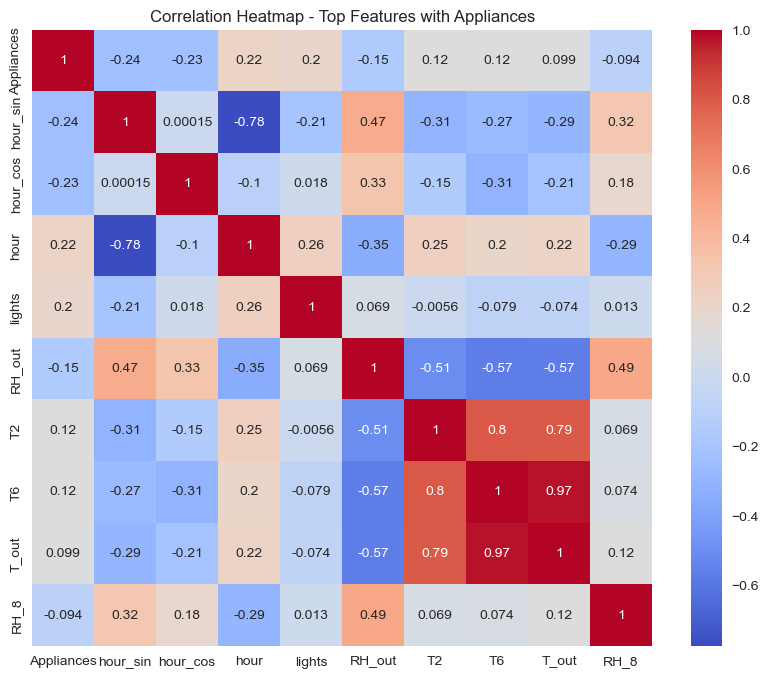

In [1204]:
# Plot heatmap of top correlated features
import seaborn as sns
import matplotlib.pyplot as plt

top_corr = df.corr().abs().nlargest(10, 'Appliances')['Appliances'].index
plt.figure(figsize=(10, 8))
sns.heatmap(df[top_corr].corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap - Top Features with Appliances")
plt.show()


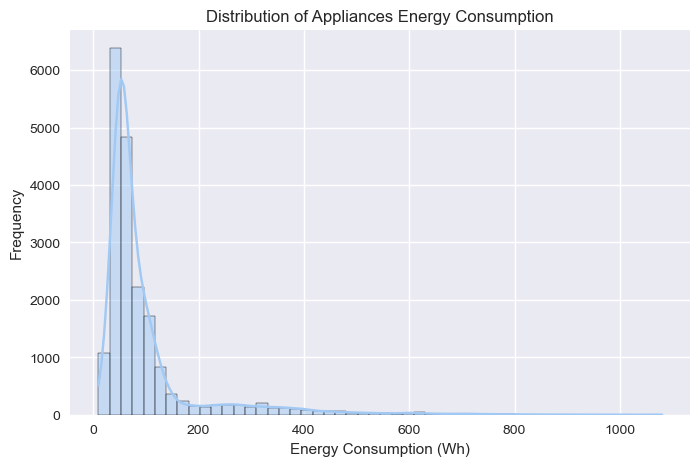

In [1205]:
# Plot the distribution of energy consumption for appliances
# The histogram shows how frequently different consumption values occur
# KDE (kernel density estimate) adds a smooth curve to represent the distribution
plt.figure(figsize=(8, 5))
sns.histplot(df['Appliances'], bins=50, kde=True)
plt.title('Distribution of Appliances Energy Consumption')
plt.xlabel('Energy Consumption (Wh)')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()


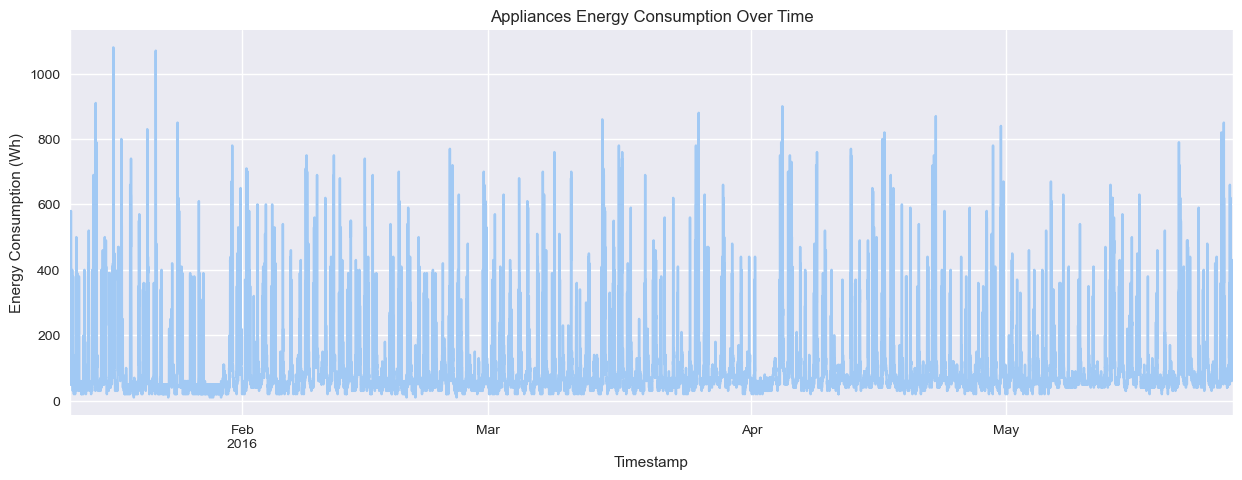

In [1206]:
# Plot the appliances energy consumption over time
# This helps identify trends, seasonality, or sudden changes in usage
plt.figure(figsize=(15, 5))
df['Appliances'].plot()
plt.title('Appliances Energy Consumption Over Time')
plt.xlabel('Timestamp')
plt.ylabel('Energy Consumption (Wh)')
plt.grid(True)
plt.show()


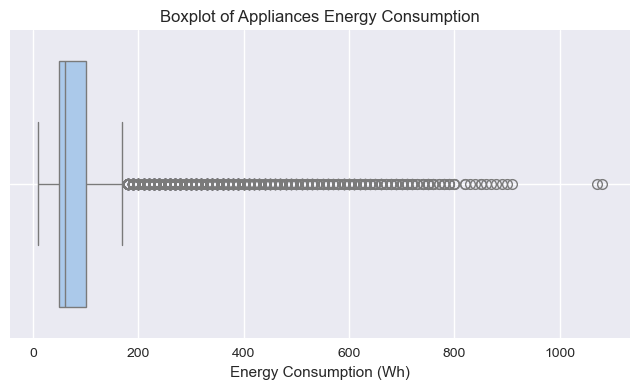

In [1207]:
# Use a boxplot to visually identify the presence of outliers in the data
# Outliers appear as points beyond the whiskers of the box
plt.figure(figsize=(8, 4))
sns.boxplot(x=df['Appliances'])
plt.title('Boxplot of Appliances Energy Consumption')
plt.xlabel('Energy Consumption (Wh)')
plt.grid(True)
plt.show()


In [1208]:
# Defining quantiles Q1 and Q3
Q1 = df['Appliances'].quantile(0.25)
Q3 = df['Appliances'].quantile(0.75)
IQR = Q3 - Q1

# Define outlier bounds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identify outliers
outliers = df[(df['Appliances'] < lower_bound) | (df['Appliances'] > upper_bound)]

# Display results
print(f"Total data points: {len(df)}")
print(f"Number of outliers: {len(outliers)}")
print(f"Percentage of outliers: {100 * len(outliers) / len(df):.2f}%")


Total data points: 19735
Number of outliers: 2138
Percentage of outliers: 10.83%


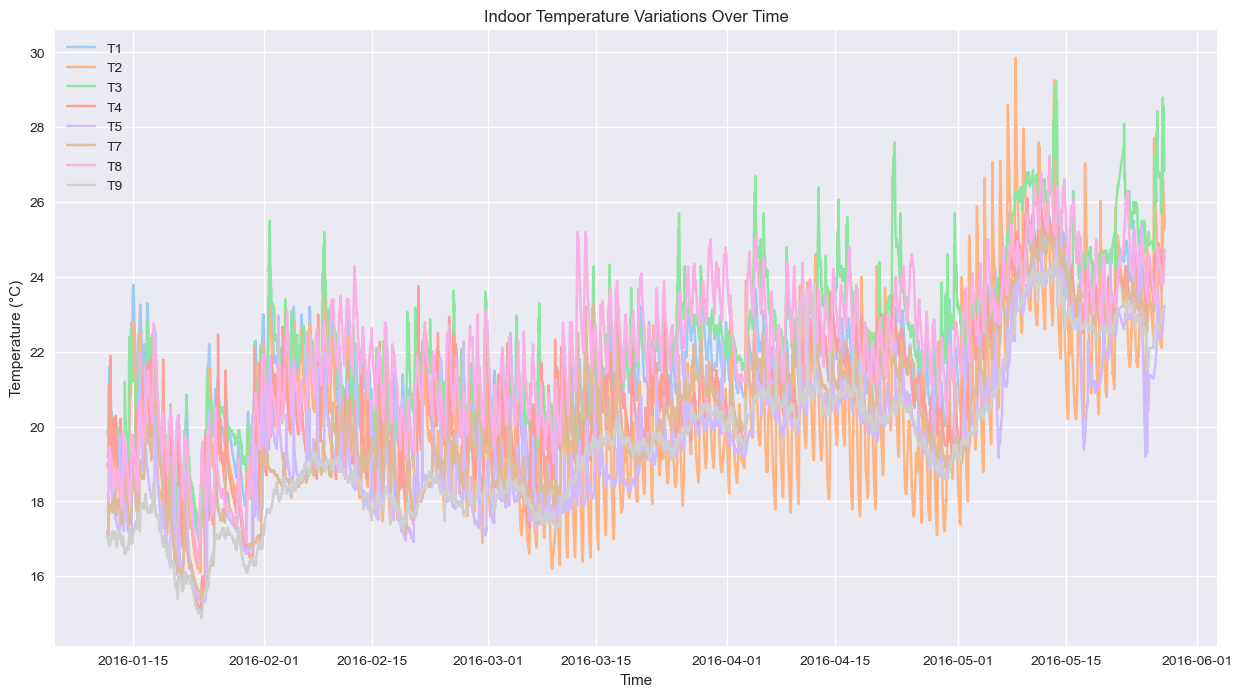

In [1209]:
# Plot indoor temperatures
plt.figure(figsize=(15,8))
for col in ['T1', 'T2', 'T3', 'T4', 'T5', 'T7', 'T8', 'T9']:
    plt.plot(df.index, df[col], label=col)
plt.title('Indoor Temperature Variations Over Time')
plt.xlabel('Time')
plt.ylabel('Temperature (°C)')
plt.legend()
plt.show()

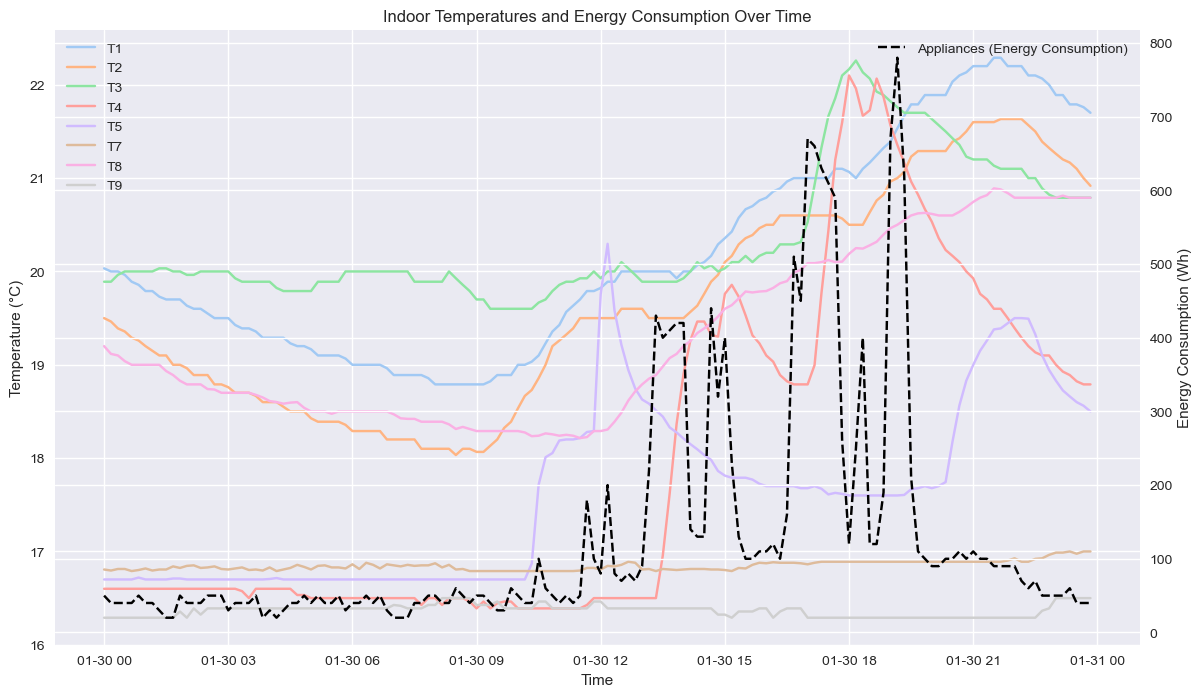

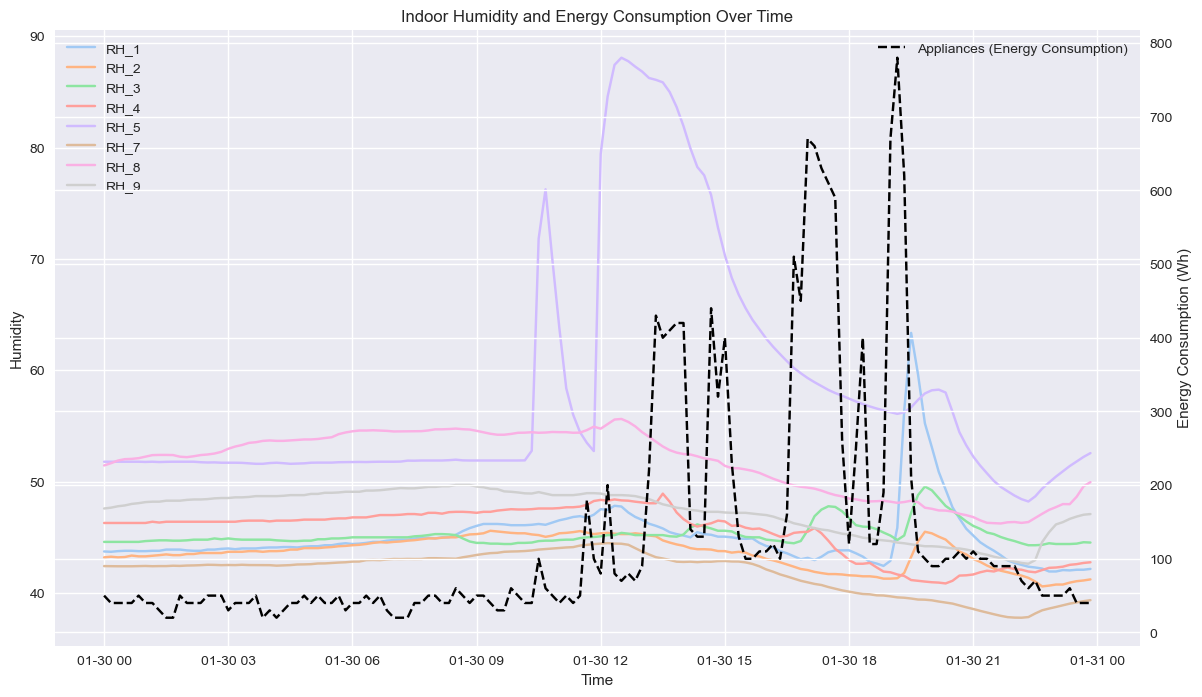

In [1210]:
# Creating a dual axis plots to show Energy consumption against the various
# temperature and humidity on a random day

#Specific dates to view
dates_to_keep = ['2016-01-30']
filtered_df = df[df.index.strftime('%Y-%m-%d').isin(dates_to_keep)]

# Specifying the temperature list
temp_cols = ['T1', 'T2', 'T3', 'T4', 'T5', 'T7', 'T8', 'T9']
Humidity_cols = ['RH_1', 'RH_2', 'RH_3', 'RH_4', 'RH_5', 'RH_7', 'RH_8', 'RH_9']

#Initiating the plot (Energy comsumption against temperature)
fig, ax1 = plt.subplots(figsize=(14,8))
# First y-axis (temperatures)
for col in temp_cols:
    sns.lineplot(x=filtered_df.index, y=filtered_df[col], ax=ax1, label=col)

ax1.set_ylabel('Temperature (°C)')
ax1.set_xlabel('Time')
ax1.legend(loc='upper left')
ax1.set_title('Indoor Temperatures and Energy Consumption Over Time')

# Creating second y-axis
ax2 = ax1.twinx()

# Second y-axis (energy consumption)
sns.lineplot(x=filtered_df.index, y=filtered_df['Appliances'], ax=ax2, color='black', label='Appliances (Energy Consumption)', linestyle='--')
ax2.set_ylabel('Energy Consumption (Wh)')
ax2.legend(loc='upper right')
plt.show()




# Initiating the plot (Energy comsumption against humidity)
fig, ax1 = plt.subplots(figsize=(14,8))

# First y-axis (Humidity)
for col in Humidity_cols:
    sns.lineplot(x=filtered_df.index, y=filtered_df[col], ax=ax1, label=col)

ax1.set_ylabel('Humidity')
ax1.set_xlabel('Time')
ax1.legend(loc='upper left')
ax1.set_title('Indoor Humidity and Energy Consumption Over Time')

# Create second y-axis
ax2 = ax1.twinx()

# Second y-axis (energy consumption)
sns.lineplot(x=filtered_df.index, y=filtered_df['Appliances'], ax=ax2, color='black', label='Appliances (Energy Consumption)', linestyle='--')
ax2.set_ylabel('Energy Consumption (Wh)')
ax2.legend(loc='upper right')
plt.show()

In [1211]:
from sklearn.preprocessing import MinMaxScaler

# Select features for modeling (drop target separately)
feature_columns = df.columns.drop(['Appliances','lights'])  # Keep 'Appliances' separate, removing 'light' as irrelevant
target_column = 'Appliances'

# Initialize the scaler
scaler = MinMaxScaler()

# Fit on the feature columns
scaled_features = scaler.fit_transform(df[feature_columns])

# Create a new DataFrame for scaled features
df_scaled = pd.DataFrame(scaled_features, columns=feature_columns, index=df.index)

# We will keep Appliances separately scaled if needed
scaler_target = MinMaxScaler()
scaled_target = scaler_target.fit_transform(df[[target_column]])

df_scaled[target_column] = scaled_target

# Confirm
df_scaled.head()


,T1,RH_1,T2,RH_2,T3,RH_3,T4,RH_4,T5,RH_5,...,rv2,hour,dayofweek,month,is_weekend,hour_sin,hour_cos,dayofweek_sin,dayofweek_cos,Appliances
date,,,,,,,,,,,,,,,,,,,,,
2016-01-11 17:00:00,0.32735,0.566187,0.225345,0.684038,0.215188,0.746066,0.351351,0.764262,0.175506,0.381691,...,0.265449,0.73913,0.0,0.0,0.0,0.017037,0.37059,0.5,1.0,0.046729
2016-01-11 17:10:00,0.32735,0.541326,0.225345,0.682140,0.215188,0.748871,0.351351,0.782437,0.175506,0.381691,...,0.372083,0.73913,0.0,0.0,0.0,0.017037,0.37059,0.5,1.0,0.046729
2016-01-11 17:20:00,0.32735,0.530502,0.225345,0.679445,0.215188,0.755569,0.344745,0.778062,0.175506,0.380037,...,0.572848,0.73913,0.0,0.0,0.0,0.017037,0.37059,0.5,1.0,0.037383
2016-01-11 17:30:00,0.32735,0.524080,0.225345,0.678414,0.215188,0.758685,0.341441,0.770949,0.175506,0.380037,...,0.908261,0.73913,0.0,0.0,0.0,0.017037,0.37059,0.5,1.0,0.037383
2016-01-11 17:40:00,0.32735,0.531419,0.225345,0.676727,0.215188,0.758685,0.341441,0.762697,0.178691,0.380037,...,0.201611,0.73913,0.0,0.0,0.0,0.017037,0.37059,0.5,1.0,0.046729


In [1212]:
# Define the split ratios
train_size = 0.7
val_size = 0.15
test_size = 0.15

n = len(df_scaled)

train_df = df_scaled.iloc[:int(n*train_size)]
val_df = df_scaled.iloc[int(n*train_size):int(n*(train_size+val_size))]
test_df = df_scaled.iloc[int(n*(train_size+val_size)):]

print("Train shape:", train_df.shape)
print("Validation shape:", val_df.shape)
print("Test shape:", test_df.shape)

Train shape: (13814, 35)
Validation shape: (2960, 35)
Test shape: (2961, 35)


In [1213]:
# Define function to create sequences
def create_sequences(data, n_steps, target_column):
    X, y = [], []
    for i in range(n_steps, len(data)):
        X.append(data.iloc[i-n_steps:i].drop(target_column, axis=1).values)
        y.append(data.iloc[i][target_column])
    return np.array(X), np.array(y)

# Define how many past time steps you want to look back
n_steps = 36  # For example, past 6 hours (36 * 10 minutes)

# Create sequences for train, validation, and test
X_train, y_train = create_sequences(train_df, n_steps, target_column)
X_val, y_val = create_sequences(val_df, n_steps, target_column)
X_test, y_test = create_sequences(test_df, n_steps, target_column)

# Check shapes
print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)
print("X_val shape:", X_val.shape)
print("y_val shape:", y_val.shape)
print("X_test shape:", X_test.shape)
print("y_test shape:", y_test.shape)

X_train shape: (13778, 36, 34)
y_train shape: (13778,)
X_val shape: (2924, 36, 34)
y_val shape: (2924,)
X_test shape: (2925, 36, 34)
y_test shape: (2925,)


# Vanilla RNN

In [1215]:
# Vanilla RNN
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import SimpleRNN, Dense, Input
from tensorflow.keras.callbacks import EarlyStopping
import matplotlib.pyplot as plt
import numpy as np

# Input shape
n_timesteps = X_train.shape[1]
n_features = X_train.shape[2]

# Build the model
model_rnn = Sequential([
    Input(shape=(n_timesteps, n_features)),
    SimpleRNN(64, activation='tanh'),
    Dense(1)  # Predicting a single value
])

# Compile the model
model_rnn.compile(
    optimizer='adam',
    loss='mean_squared_error',
    metrics=['mae']
)

# Summary
model_rnn.summary()

Model: "sequential_41"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ simple_rnn_20 (SimpleRNN)       │ (None, 64)             │         6,336 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_51 (Dense)                │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 6,401 (25.00 KB)

 Trainable params: 6,401 (25.00 KB)

 Non-trainable params: 0 (0.00 B)

In [1216]:
# Early stopping to prevent overfitting
early_stop = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# Train
history = model_rnn.fit(
    X_train, y_train,
    validation_data=(X_val, y_val),
    epochs=50,
    batch_size=32,
    callbacks=[early_stop],
    verbose=1
)

Epoch 1/50
431/431 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 0.0187 - mae: 0.0924 - val_loss: 0.0072 - val_mae: 0.0521
Epoch 2/50
431/431 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0096 - mae: 0.0632 - val_loss: 0.0106 - val_mae: 0.0655
Epoch 3/50
431/431 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0093 - mae: 0.0608 - val_loss: 0.0070 - val_mae: 0.0512
Epoch 4/50
431/431 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0095 - mae: 0.0622 - val_loss: 0.0067 - val_mae: 0.0420
Epoch 5/50
431/431 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0087 - mae: 0.0569 - val_loss: 0.0068 - val_mae: 0.0439
Epoch 6/50
431/431 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0089 - mae: 0.0606 - val_loss: 0.0070 - val_mae: 0.0461
Epoch 7/50
431/431 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0088 - mae: 0.0564 - val_loss: 0.0094 - val_mae: 0.0792
Epoch 8/50
431/431 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0083 - mae: 0.0566 - val_loss: 0.0070 - val_mae: 0.0461
Epoch 9/50
431/431 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - lo

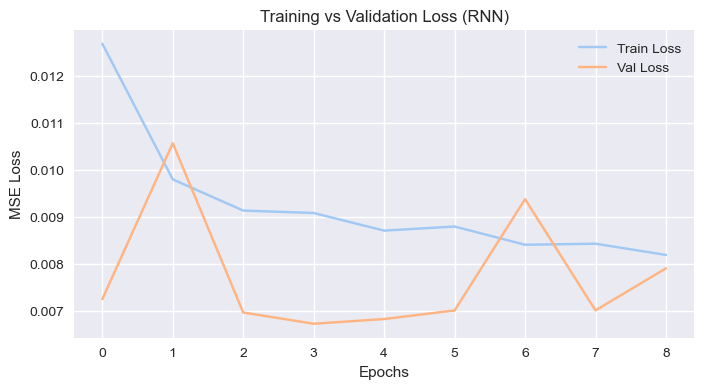

In [1217]:
#Plot for RNN training vs validation loss curve
plt.figure(figsize=(8, 4))
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.title('Training vs Validation Loss (RNN)')
plt.xlabel('Epochs')
plt.ylabel('MSE Loss')
plt.legend()
plt.grid(True)
plt.show()

In [1218]:
# Evaluate
test_loss, test_mae = model_rnn.evaluate(X_test, y_test)
print(f"Test Loss (MSE): {test_loss:.4f}")
print(f"Test MAE: {test_mae:.4f}")

92/92 ━━━━━━━━━━━━━━━━━━━━ 0s 756us/step - loss: 0.0076 - mae: 0.0626
Test Loss (MSE): 0.0083
Test MAE: 0.0630


In [1219]:
# Predict and inverse scale
y_pred_scaled = model_rnn.predict(X_test)
y_pred = scaler_target.inverse_transform(y_pred_scaled)
y_true = scaler_target.inverse_transform(y_test.reshape(-1, 1))


92/92 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step  


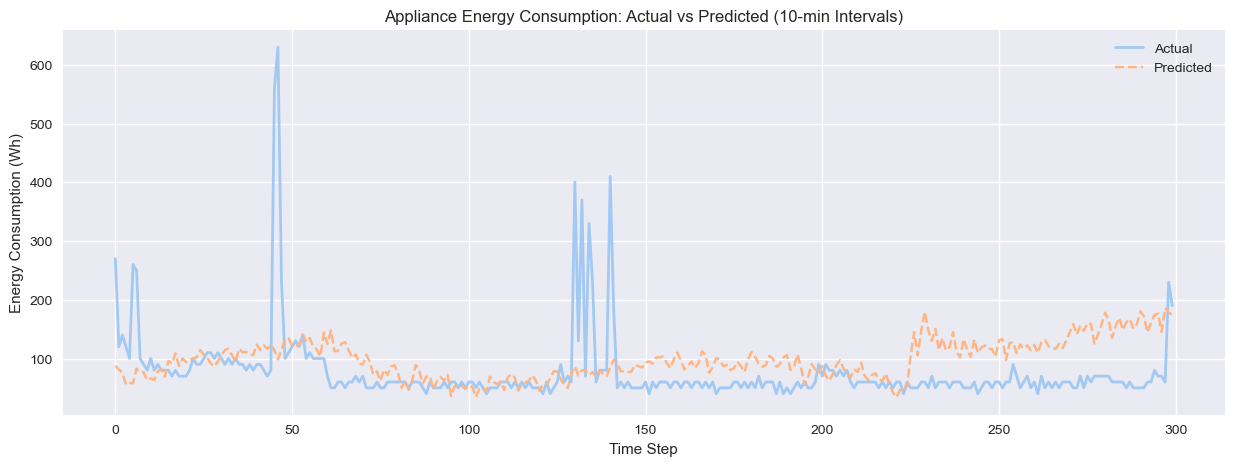

In [1220]:
# Plot actual vs predicted for RNN
plt.figure(figsize=(15, 5))
plt.plot(y_true[:300], label='Actual', linewidth=2)
plt.plot(y_pred[:300], label='Predicted', linestyle='--')
plt.title('Appliance Energy Consumption: Actual vs Predicted (10-min Intervals)')
plt.xlabel('Time Step')
plt.ylabel('Energy Consumption (Wh)')
plt.legend()
plt.grid(True)
plt.show()

## Bi RNN

In [1222]:
# Bidirectional RNN
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Bidirectional, SimpleRNN, Dense, Input
from tensorflow.keras.callbacks import EarlyStopping
# Input shape
n_timesteps = X_train.shape[1]
n_features = X_train.shape[2]

# Build the Bidirectional RNN model
model_birnn = Sequential([
    Input(shape=(n_timesteps, n_features)),
    Bidirectional(SimpleRNN(64, activation='tanh')),
    Dense(1)  # Predicting a single output value
])

# Compile the model
model_birnn.compile(
    optimizer='adam',
    loss='mean_squared_error',
    metrics=['mae']
)

# Summary
model_birnn.summary()



Model: "sequential_42"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ bidirectional_10                │ (None, 128)            │        12,672 │
│ (Bidirectional)                 │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_52 (Dense)                │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 12,801 (50.00 KB)

 Trainable params: 12,801 (50.00 KB)

 Non-trainable params: 0 (0.00 B)

In [1223]:
# Early stopping callback
early_stop = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# Train the model
history_birnn = model_birnn.fit(
    X_train, y_train,
    validation_data=(X_val, y_val),
    epochs=50,
    batch_size=32,
    callbacks=[early_stop],
    verbose=1
)

Epoch 1/50
431/431 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 0.0439 - mae: 0.1303 - val_loss: 0.0118 - val_mae: 0.0913
Epoch 2/50
431/431 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0100 - mae: 0.0650 - val_loss: 0.0081 - val_mae: 0.0600
Epoch 3/50
431/431 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0094 - mae: 0.0619 - val_loss: 0.0089 - val_mae: 0.0732
Epoch 4/50
431/431 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0089 - mae: 0.0618 - val_loss: 0.0069 - val_mae: 0.0510
Epoch 5/50
431/431 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0089 - mae: 0.0606 - val_loss: 0.0088 - val_mae: 0.0555
Epoch 6/50
431/431 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0086 - mae: 0.0594 - val_loss: 0.0067 - val_mae: 0.0530
Epoch 7/50
431/431 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0081 - mae: 0.0576 - val_loss: 0.0112 - val_mae: 0.0713
Epoch 8/50
431/431 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0088 - mae: 0.0599 - val_loss: 0.0082 - val_mae: 0.0658
Epoch 9/50
431/431 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - lo

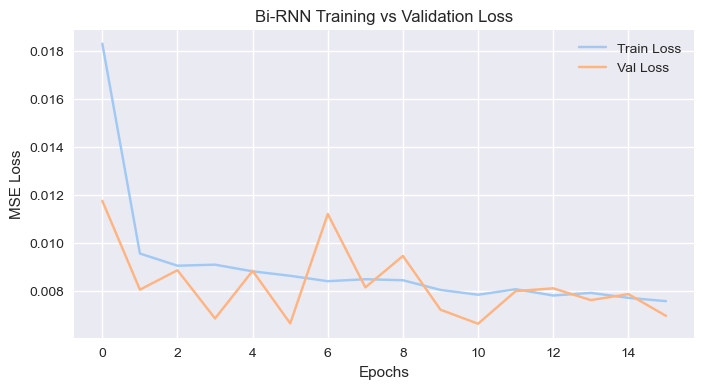

In [1224]:
# Plot training history
plt.figure(figsize=(8, 4))
plt.plot(history_birnn.history['loss'], label='Train Loss')
plt.plot(history_birnn.history['val_loss'], label='Val Loss')
plt.title('Bi-RNN Training vs Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('MSE Loss')
plt.legend()
plt.grid(True)
plt.show()



In [1225]:
# Evaluate on test data
test_loss_birnn, test_mae_birnn = model_birnn.evaluate(X_test, y_test)
print(f"Test Loss (MSE): {test_loss_birnn:.4f}")
print(f"Test MAE: {test_mae_birnn:.4f}")

92/92 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0057 - mae: 0.0485
Test Loss (MSE): 0.0070
Test MAE: 0.0539


In [1226]:
# Predict and inverse scale
y_pred_scaled_birnn = model_birnn.predict(X_test)
y_pred_birnn = scaler_target.inverse_transform(y_pred_scaled_birnn)
y_true_birnn = scaler_target.inverse_transform(y_test.reshape(-1, 1))

92/92 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


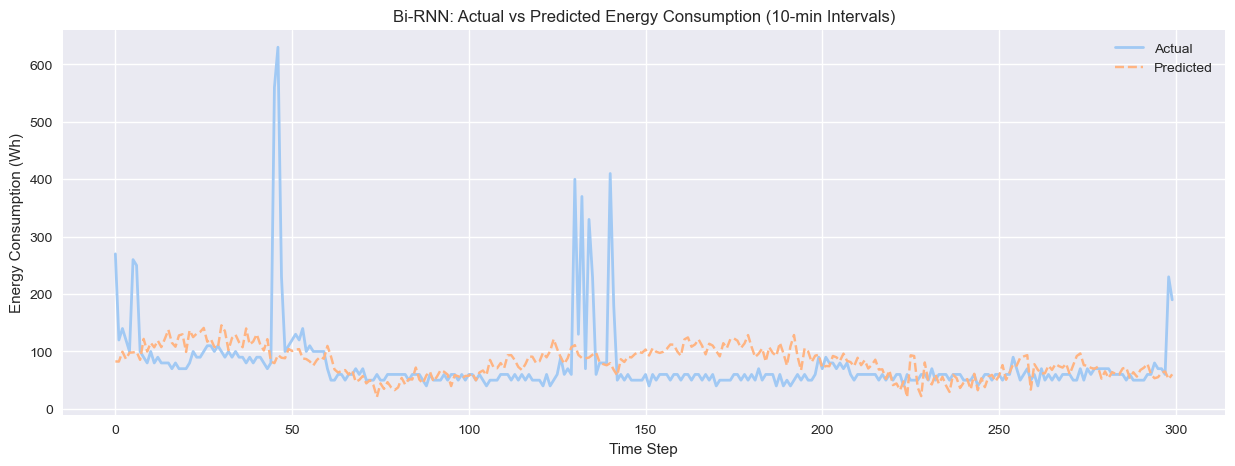

In [1227]:
# Plot predictions vs actual
plt.figure(figsize=(15, 5))
plt.plot(y_true_birnn[:300], label='Actual', linewidth=2)
plt.plot(y_pred_birnn[:300], label='Predicted', linestyle='--')
plt.title('Bi-RNN: Actual vs Predicted Energy Consumption (10-min Intervals)')
plt.xlabel('Time Step')
plt.ylabel('Energy Consumption (Wh)')
plt.legend()
plt.grid(True)
plt.show()

# LSTM

In [1229]:
# LSTM Model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Input
from tensorflow.keras.callbacks import EarlyStopping

# Define LSTM model
model_lstm = Sequential([
    Input(shape=(X_train.shape[1], X_train.shape[2])),
    LSTM(64, activation='tanh'),
    Dense(1)
])

# Compile the model
model_lstm.compile(
    optimizer='adam',
    loss='mean_squared_error',
    metrics=['mae']
)

# Model summary
model_lstm.summary()




Model: "sequential_43"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_33 (LSTM)                  │ (None, 64)             │        25,344 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_53 (Dense)                │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 25,409 (99.25 KB)

 Trainable params: 25,409 (99.25 KB)

 Non-trainable params: 0 (0.00 B)

In [1230]:
# Early stopping to prevent overfitting
early_stop = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# Fit model
history_lstm = model_lstm.fit(
    X_train, y_train,
    validation_data=(X_val, y_val),
    epochs=50,
    batch_size=32,
    callbacks=[early_stop],
    verbose=1
)


Epoch 1/50
431/431 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 0.0120 - mae: 0.0715 - val_loss: 0.0073 - val_mae: 0.0517
Epoch 2/50
431/431 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 0.0085 - mae: 0.0550 - val_loss: 0.0067 - val_mae: 0.0502
Epoch 3/50
431/431 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 0.0078 - mae: 0.0529 - val_loss: 0.0071 - val_mae: 0.0427
Epoch 4/50
431/431 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 0.0077 - mae: 0.0528 - val_loss: 0.0070 - val_mae: 0.0482
Epoch 5/50
431/431 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 0.0075 - mae: 0.0505 - val_loss: 0.0059 - val_mae: 0.0446
Epoch 6/50
431/431 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 0.0074 - mae: 0.0510 - val_loss: 0.0069 - val_mae: 0.0413
Epoch 7/50
431/431 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 0.0076 - mae: 0.0506 - val_loss: 0.0064 - val_mae: 0.0505
Epoch 8/50
431/431 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 0.0073 - mae: 0.0490 - val_loss: 0.0067 - val_mae: 0.0455
Epoch 9/50
431/431 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - lo

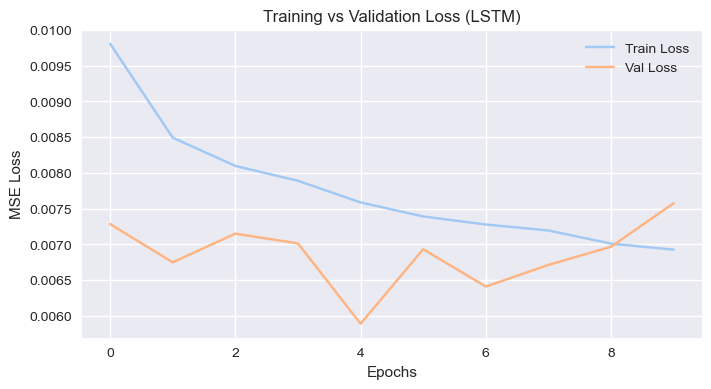

In [1231]:
# Plot training vs validation loss for LSTM
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 4))
plt.plot(history_lstm.history['loss'], label='Train Loss')
plt.plot(history_lstm.history['val_loss'], label='Val Loss')
plt.title('Training vs Validation Loss (LSTM)')
plt.xlabel('Epochs')
plt.ylabel('MSE Loss')
plt.legend()
plt.grid(True)
plt.show()


In [1232]:
# Evaluate on test set
test_loss_lstm, test_mae_lstm = model_lstm.evaluate(X_test, y_test)
print(f"Test Loss (MSE): {test_loss_lstm:.4f}")
print(f"Test MAE: {test_mae_lstm:.4f}")

92/92 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0099 - mae: 0.0823
Test Loss (MSE): 0.0092
Test MAE: 0.0728


In [1233]:
# Predict and inverse transform
y_pred_lstm_scaled = model_lstm.predict(X_test)
y_pred_lstm = scaler_target.inverse_transform(y_pred_lstm_scaled)
y_true_lstm = scaler_target.inverse_transform(y_test.reshape(-1, 1))

92/92 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


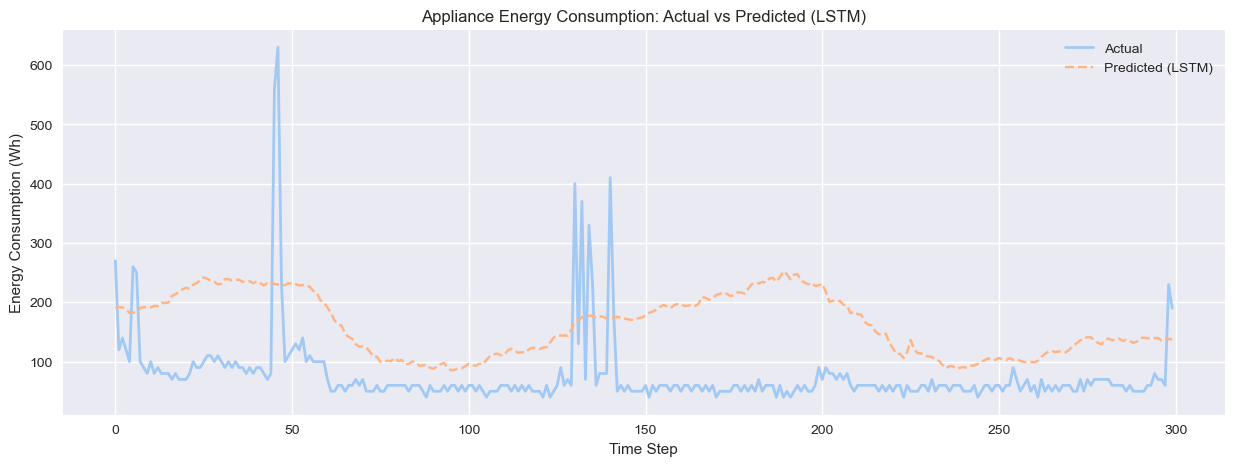

In [1234]:
# Plot actual vs predicted engergy consumption for LSTM
plt.figure(figsize=(15, 5))
plt.plot(y_true_lstm[:300], label='Actual', linewidth=2)
plt.plot(y_pred_lstm[:300], label='Predicted (LSTM)', linestyle='--')
plt.title('Appliance Energy Consumption: Actual vs Predicted (LSTM)')
plt.xlabel('Time Step')
plt.ylabel('Energy Consumption (Wh)')
plt.legend()
plt.grid(True)
plt.show()


# GRU

In [1236]:
# GRU model 
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import GRU, Dense, Input
from tensorflow.keras.callbacks import EarlyStopping

# Build GRU model
model_gru = Sequential([
    Input(shape=(X_train.shape[1], X_train.shape[2])),
    GRU(64, activation='tanh'),
    Dense(1)
])

# Compile the model
model_gru.compile(
    optimizer='adam',
    loss='mean_squared_error',
    metrics=['mae']
)

# Summary
model_gru.summary()


Model: "sequential_44"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ gru_9 (GRU)                     │ (None, 64)             │        19,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_54 (Dense)                │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 19,265 (75.25 KB)

 Trainable params: 19,265 (75.25 KB)

 Non-trainable params: 0 (0.00 B)

In [1237]:
# early stopping to avoid overfitting
early_stop = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

history_gru = model_gru.fit(
    X_train, y_train,
    validation_data=(X_val, y_val),
    epochs=50,
    batch_size=32,
    callbacks=[early_stop],
    verbose=1
)


Epoch 1/50
431/431 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - loss: 0.0131 - mae: 0.0759 - val_loss: 0.0068 - val_mae: 0.0469
Epoch 2/50
431/431 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 0.0088 - mae: 0.0555 - val_loss: 0.0085 - val_mae: 0.0710
Epoch 3/50
431/431 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 0.0084 - mae: 0.0567 - val_loss: 0.0061 - val_mae: 0.0469
Epoch 4/50
431/431 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 0.0085 - mae: 0.0543 - val_loss: 0.0073 - val_mae: 0.0469
Epoch 5/50
431/431 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 0.0086 - mae: 0.0570 - val_loss: 0.0061 - val_mae: 0.0416
Epoch 6/50
431/431 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 0.0074 - mae: 0.0518 - val_loss: 0.0065 - val_mae: 0.0444
Epoch 7/50
431/431 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 0.0082 - mae: 0.0547 - val_loss: 0.0060 - val_mae: 0.0421
Epoch 8/50
431/431 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 0.0074 - mae: 0.0512 - val_loss: 0.0062 - val_mae: 0.0465
Epoch 9/50
431/431 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - lo

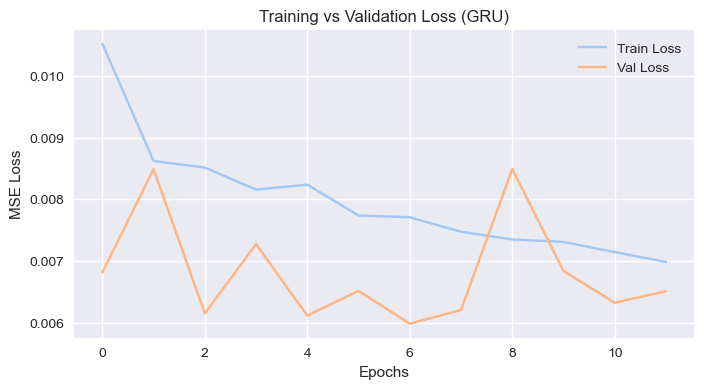

In [1238]:
# Plot train vs validation loss for GRU
plt.figure(figsize=(8, 4))
plt.plot(history_gru.history['loss'], label='Train Loss')
plt.plot(history_gru.history['val_loss'], label='Val Loss')
plt.title('Training vs Validation Loss (GRU)')
plt.xlabel('Epochs')
plt.ylabel('MSE Loss')
plt.legend()
plt.grid(True)
plt.show()


In [1239]:
# Evaluate test performance
test_loss_gru, test_mae_gru = model_gru.evaluate(X_test, y_test)
print(f"Test Loss (MSE): {test_loss_gru:.4f}")
print(f"Test MAE: {test_mae_gru:.4f}")


92/92 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0058 - mae: 0.0464
Test Loss (MSE): 0.0068
Test MAE: 0.0498


In [1240]:
# Predict
y_pred_gru_scaled = model_gru.predict(X_test)
y_pred_gru = scaler_target.inverse_transform(y_pred_gru_scaled)
y_true_gru = scaler_target.inverse_transform(y_test.reshape(-1, 1))


92/92 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


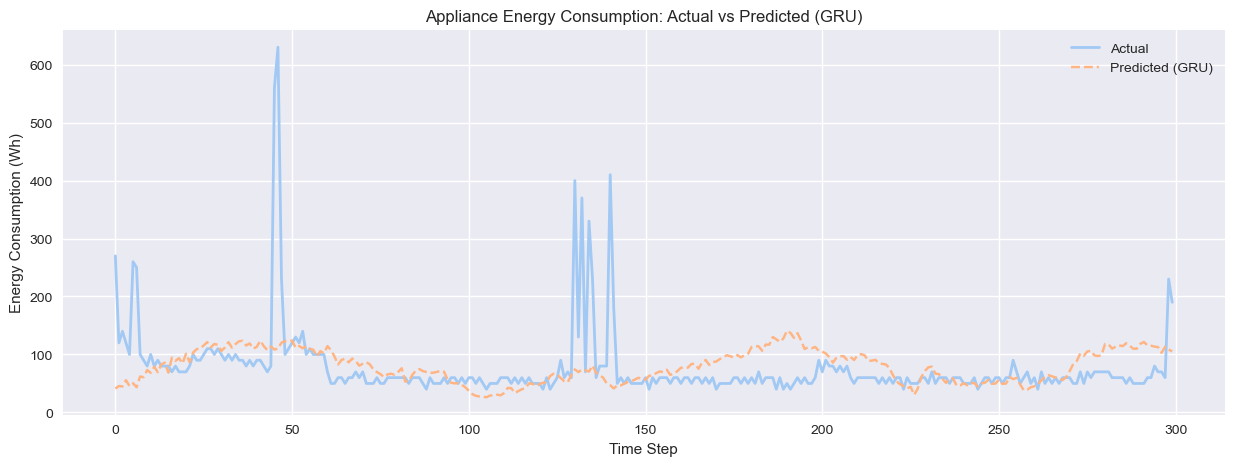

In [1241]:
# Plot Energy consumption actual vs predicted GRU
plt.figure(figsize=(15, 5))
plt.plot(y_true_gru[:300], label='Actual', linewidth=2)
plt.plot(y_pred_gru[:300], label='Predicted (GRU)', linestyle='--')
plt.title('Appliance Energy Consumption: Actual vs Predicted (GRU)')
plt.xlabel('Time Step')
plt.ylabel('Energy Consumption (Wh)')
plt.legend()
plt.grid(True)
plt.show()


# Encoder - Decoder

In [1243]:
# Input shape
n_timesteps = X_train.shape[1]
n_features = X_train.shape[2]

# Reshape targets for sequence output (required shape: [samples, time_steps, features])
y_train_seq = y_train.reshape((y_train.shape[0], 1, 1))
y_val_seq = y_val.reshape((y_val.shape[0], 1, 1))
y_test_seq = y_test.reshape((y_test.shape[0], 1, 1))

In [1244]:
# Define Encoder-decoder model
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, LSTM, RepeatVector, TimeDistributed, Dense
encoder_inputs = Input(shape=(n_timesteps, n_features))
encoder_lstm = LSTM(64, activation='tanh', return_sequences=False)(encoder_inputs)
context_vector = RepeatVector(1)(encoder_lstm)

decoder_lstm = LSTM(64, activation='tanh', return_sequences=True)(context_vector)
decoder_output = TimeDistributed(Dense(1))(decoder_lstm)

model_encdec = Model(inputs=encoder_inputs, outputs=decoder_output)

# Compile model
model_encdec.compile(
    optimizer='adam',
    loss='mean_squared_error',
    metrics=['mae']
)

# Summary
model_encdec.summary()

Model: "functional_55"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_56 (InputLayer)     │ (None, 36, 34)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_34 (LSTM)                  │ (None, 64)             │        25,344 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ repeat_vector_10 (RepeatVector) │ (None, 1, 64)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_35 (LSTM)                  │ (None, 1, 64)          │        33,024 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ time_distributed_10             │ (None, 1, 1)           │            65 │
│ (TimeDistributed)               │                        │               │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 58,433 (228.25 KB)

 Trainable params: 58,433 (228.25 KB)

 Non-trainable params: 0 (0.00 B)

In [1245]:
# Early stopping to prevent overfitting
early_stop = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# Train
history_encdec = model_encdec.fit(
    X_train, y_train_seq,
    validation_data=(X_val, y_val_seq),
    epochs=50,
    batch_size=32,
    callbacks=[early_stop],
    verbose=1
)

Epoch 1/50
431/431 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - loss: 0.0099 - mae: 0.0580 - val_loss: 0.0066 - val_mae: 0.0437
Epoch 2/50
431/431 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 0.0086 - mae: 0.0542 - val_loss: 0.0067 - val_mae: 0.0469
Epoch 3/50
431/431 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 0.0081 - mae: 0.0507 - val_loss: 0.0070 - val_mae: 0.0398
Epoch 4/50
431/431 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 0.0081 - mae: 0.0513 - val_loss: 0.0065 - val_mae: 0.0468
Epoch 5/50
431/431 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 0.0075 - mae: 0.0483 - val_loss: 0.0064 - val_mae: 0.0436
Epoch 6/50
431/431 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 0.0074 - mae: 0.0472 - val_loss: 0.0066 - val_mae: 0.0407
Epoch 7/50
431/431 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 0.0069 - mae: 0.0457 - val_loss: 0.0064 - val_mae: 0.0385
Epoch 8/50
431/431 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 0.0070 - mae: 0.0465 - val_loss: 0.0074 - val_mae: 0.0436
Epoch 9/50
431/431 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - lo

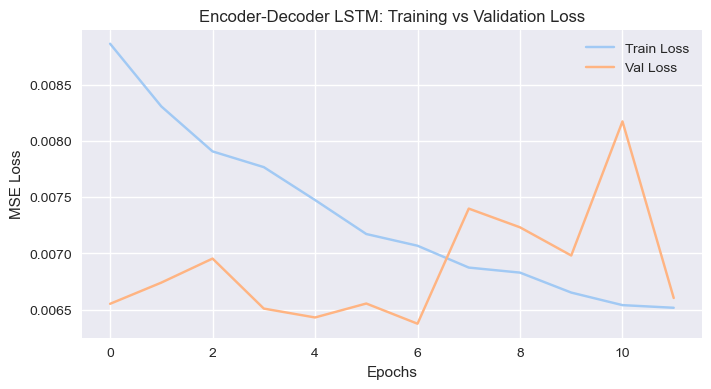

In [1246]:
# Plot training history
plt.figure(figsize=(8, 4))
plt.plot(history_encdec.history['loss'], label='Train Loss')
plt.plot(history_encdec.history['val_loss'], label='Val Loss')
plt.title('Encoder-Decoder LSTM: Training vs Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('MSE Loss')
plt.legend()
plt.grid(True)
plt.show()

In [1247]:
# Evaluate
test_loss_encdec, test_mae_encdec = model_encdec.evaluate(X_test, y_test_seq)
print(f"Test Loss (MSE): {test_loss_encdec:.4f}")
print(f"Test MAE: {test_mae_encdec:.4f}")

92/92 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0055 - mae: 0.0445
Test Loss (MSE): 0.0069
Test MAE: 0.0476


In [1248]:
# Predict and inverse scale
y_pred_scaled_encdec = model_encdec.predict(X_test)
y_pred_encdec = scaler_target.inverse_transform(y_pred_scaled_encdec[:, 0])
y_true_encdec = scaler_target.inverse_transform(y_test.reshape(-1, 1))

92/92 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


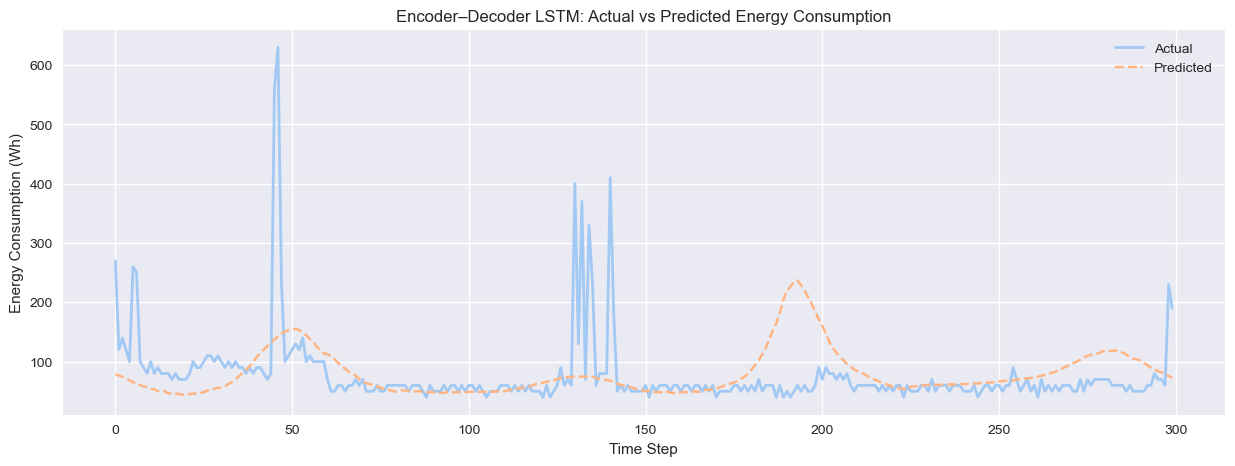

In [1249]:
# Plot predictions
plt.figure(figsize=(15, 5))
plt.plot(y_true_encdec[:300], label='Actual', linewidth=2)
plt.plot(y_pred_encdec[:300], label='Predicted', linestyle='--')
plt.title('Encoder–Decoder LSTM: Actual vs Predicted Energy Consumption')
plt.xlabel('Time Step')
plt.ylabel('Energy Consumption (Wh)')
plt.legend()
plt.grid(True)
plt.show()

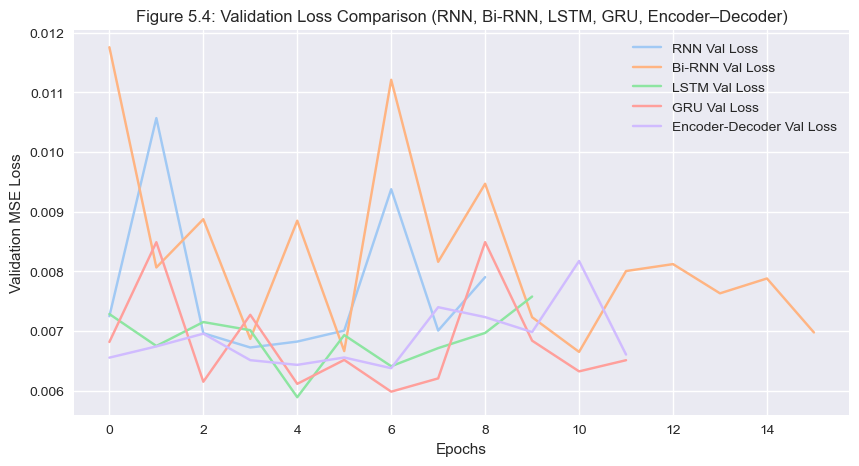

In [1250]:
#plot all models loss curve
plt.figure(figsize=(10, 5))
plt.plot(history.history['val_loss'], label='RNN Val Loss')
plt.plot(history_birnn.history['val_loss'], label='Bi-RNN Val Loss')
plt.plot(history_lstm.history['val_loss'], label='LSTM Val Loss')
plt.plot(history_gru.history['val_loss'], label='GRU Val Loss')
plt.plot(history_encdec.history['val_loss'], label='Encoder-Decoder Val Loss')
plt.title('Figure 5.4: Validation Loss Comparison (RNN, Bi-RNN, LSTM, GRU, Encoder–Decoder)')
plt.xlabel('Epochs')
plt.ylabel('Validation MSE Loss')
plt.legend()
plt.grid(True)
plt.show()


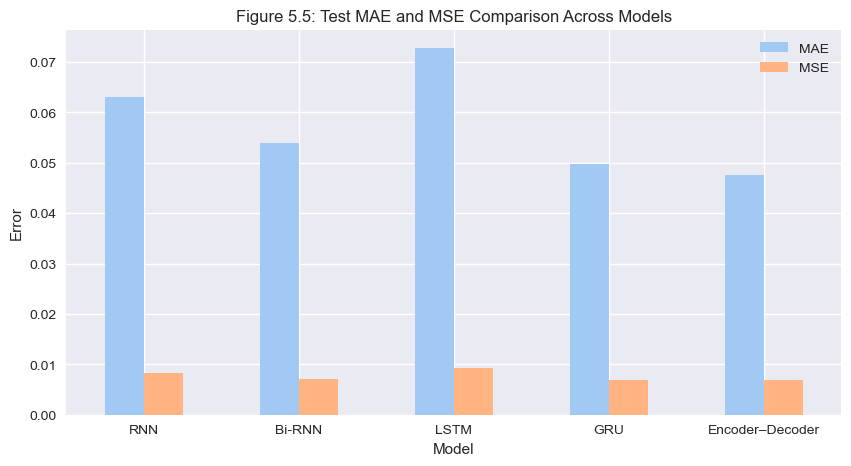

In [1251]:
# plot bar chart for MSE and MAE for all the models
import pandas as pd
import matplotlib.pyplot as plt

# Replace with actual results
results = {
    'Model': ['RNN', 'Bi-RNN', 'LSTM', 'GRU', 'Encoder–Decoder'],
    'MAE': [test_mae, test_mae_birnn, test_mae_lstm, test_mae_gru, test_mae_encdec],
    'MSE': [test_loss, test_loss_birnn, test_loss_lstm, test_loss_gru, test_loss_encdec]
}

df_results = pd.DataFrame(results)

# Bar chart for MAE and MSE
df_results.set_index('Model')[['MAE', 'MSE']].plot(kind='bar', figsize=(10, 5))
plt.title('Figure 5.5: Test MAE and MSE Comparison Across Models')
plt.ylabel('Error')
plt.grid(True)
plt.xticks(rotation=0)
plt.show()

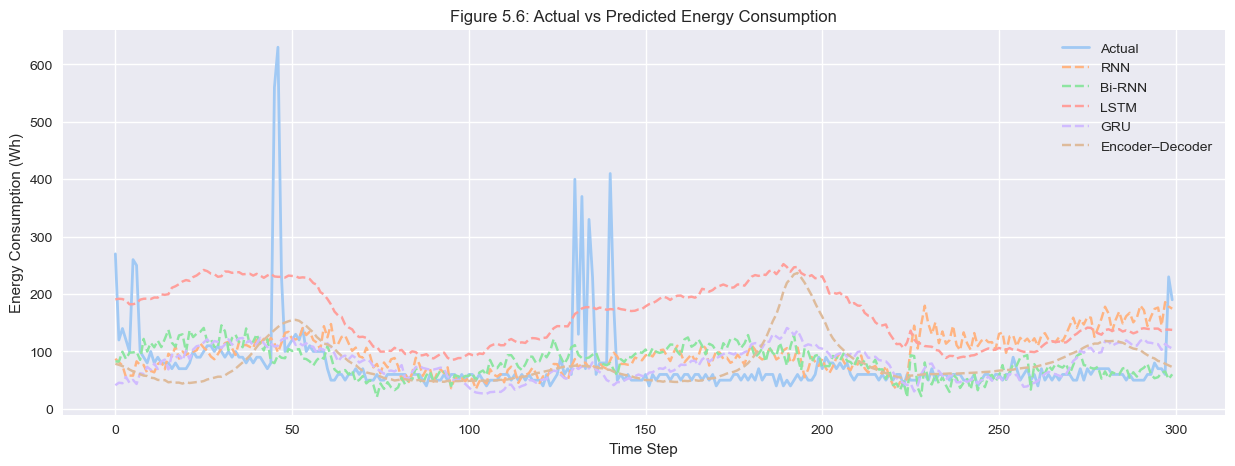

In [1252]:
# Plot Actual vs Predicted for all models on single chart
plt.figure(figsize=(15, 5))
plt.plot(y_true[:300], label='Actual', linewidth=2)
plt.plot(y_pred[:300], label='RNN', linestyle='--')
plt.plot(y_pred_birnn[:300], label='Bi-RNN', linestyle='--')
plt.plot(y_pred_lstm[:300], label='LSTM', linestyle='--')
plt.plot(y_pred_gru[:300], label='GRU', linestyle='--')
plt.plot(y_pred_encdec[:300], label='Encoder–Decoder', linestyle='--')
plt.title('Figure 5.6: Actual vs Predicted Energy Consumption')
plt.xlabel('Time Step')
plt.ylabel('Energy Consumption (Wh)')
plt.legend()
plt.grid(True)
plt.show()


In [1253]:
# Comparing all models using MSE and MAE.
model_performance = {
    'Model': ['Vanilla RNN', 'Bi-RNN', 'LSTM', 'GRU', 'Encoder–Decoder'],
    'MSE': [test_loss, test_loss_birnn, test_loss_lstm, test_loss_gru, test_loss_encdec],
    'MAE': [test_mae, test_mae_birnn, test_mae_lstm, test_mae_gru, test_mae_encdec]
}

df_perf = pd.DataFrame(model_performance)

# Sort by MSE
df_perf_sorted = df_perf.sort_values(by='MSE', ascending=True).reset_index(drop=True)

# Display
print("Sorted Model Performance (Lowest MSE First):")
print(df_perf_sorted)

Sorted Model Performance (Lowest MSE First):
             Model       MSE       MAE
0              GRU  0.006802  0.049824
1  Encoder–Decoder  0.006917  0.047587
2           Bi-RNN  0.007022  0.053921
3      Vanilla RNN  0.008280  0.063031
4             LSTM  0.009226  0.072790
